In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import scipy
from scipy import stats

In [2]:
import sys
sys.path.append("./../Scripts/")
import inv_flux as invf

/home/student.unimelb.edu.au/rursino/anaconda3/lib/python3.7/site-packages/xarray/core/merge.py:17: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  PANDAS_TYPES = (pd.Series, pd.DataFrame, pd.Panel)


In [3]:
from importlib import reload

In [177]:
reload(invf)

<module 'inv_flux' from './../Scripts/inv_flux.py'>

In [178]:
fCAMS = pickle.load(open("./../Output/output_raw/output_all/CAMS_all/year.pik", "rb"))

# ModelEvaluation

In [179]:
CAMS = invf.ModelEvaluation(fCAMS)
CAMS.data

<xarray.Dataset>
Dimensions:         (time: 39)
Coordinates:
  * time            (time) object 1979-12-30 00:00:00 ... 2017-12-30 00:00:00
Data variables:
    Earth_Land      (time) float64 -0.3236 -0.2909 -1.424 ... -2.248 -3.845
    South_Land      (time) float64 -0.06017 0.09 0.05536 ... 0.08921 0.08088
    Tropical_Land   (time) float64 2.072 1.62 0.4356 ... 0.824 0.6507 -1.083
    North_Land      (time) float64 -2.335 -2.001 -1.915 ... -2.95 -2.988 -2.843
    Earth_Ocean     (time) float64 -1.054 -1.139 -1.101 ... -1.933 -2.067 -2.189
    South_Ocean     (time) float64 -0.9933 -1.133 -1.017 ... -1.448 -1.562
    Tropical_Ocean  (time) float64 0.8567 0.8374 0.8029 ... 0.4387 0.3609 0.3218
    North_Ocean     (time) float64 -0.9174 -0.8442 -0.8868 ... -0.9797 -0.9491

In [180]:
CAMS.time;

In [181]:
CAMS.GCP;

In [182]:
CAMS.regress_rolling_trend_to_GCP("land", 10)

AttributeError: 'DataArray' object has no attribute 'year'

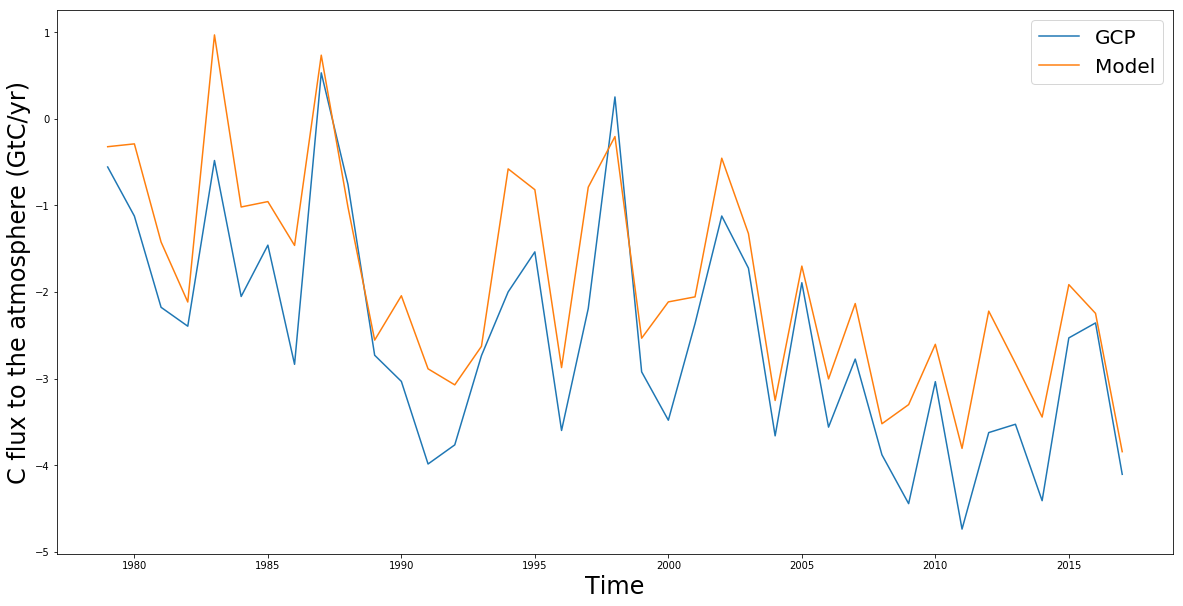

In [153]:
CAMS.plot_vs_GCP("land", "time")

/home/student.unimelb.edu.au/rursino/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


LinregressResult(slope=0.8752340489957354, intercept=0.32806285939922675, rvalue=0.9306003663997316, pvalue=9.882157873949554e-18, stderr=0.056595891361134854)

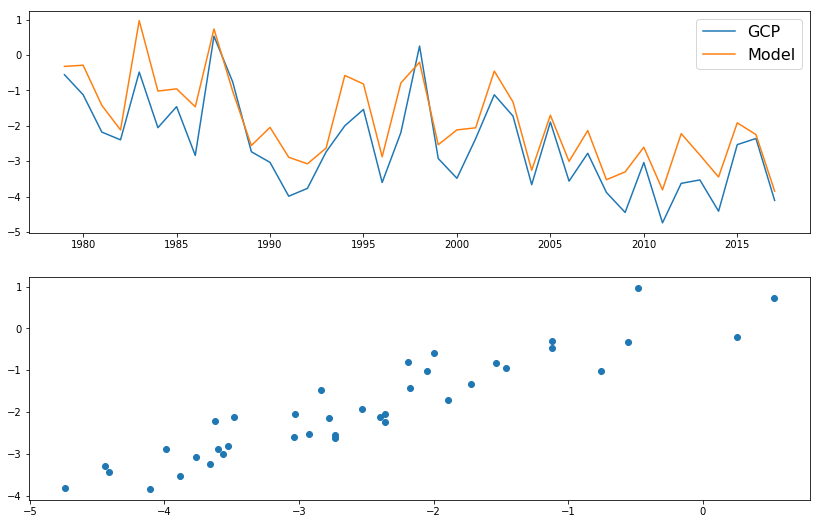

In [154]:
CAMS.regress_timeseries_to_GCP("land", plot=True)

GCP slope: -25.596 MtC/yr
Model slope: -23.429 MtC/yr
Percentage difference: 9.25%


{'GCP_slope (MtC/yr)': -25.596381471376514,
 'Model_slope (MtC/yr)': -23.42924329336258,
 '%_diff': 9.249714772597343}

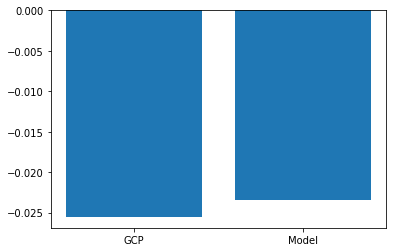

In [155]:
CAMS.compare_trend_to_GCP("ocean")

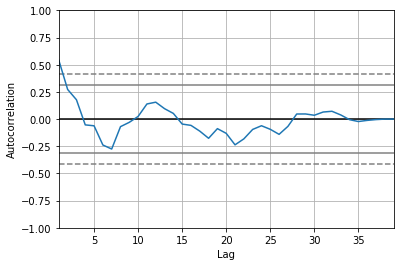

In [156]:
CAMS.autocorrelation_plot("North_Ocean")

# Analysis

In [137]:
fmCAMS = pickle.load(open("./../Output/output_raw/output_all/CAMS_all/spatial.pik", "rb"))

In [148]:
reload(invf)

<module 'inv_flux' from './../Scripts/inv_flux.py'>

In [139]:
aCAMS = invf.Analysis(fmCAMS)
aCAMS.data

<xarray.Dataset>
Dimensions:         (time: 468)
Coordinates:
  * time            (time) object 1979-01-16 00:00:00 ... 2017-12-16 00:00:00
Data variables:
    Earth_Land      (time) float64 0.4314 0.5878 0.8693 ... 1.254 1.15 0.4502
    South_Land      (time) float64 0.03146 0.04228 0.06212 ... -0.03757 0.01857
    Tropical_Land   (time) float64 -0.3288 0.06462 0.4028 ... 0.2813 -0.3327
    North_Land      (time) float64 0.7288 0.4809 0.4045 ... 0.7788 0.9061 0.7644
    Earth_Ocean     (time) float64 -0.09067 -0.09578 ... -0.1494 -0.1669
    South_Ocean     (time) float64 -0.06071 -0.06981 -0.0825 ... -0.1165 -0.1023
    Tropical_Ocean  (time) float64 0.0794 0.081 0.09499 ... 0.04063 0.03863
    North_Ocean     (time) float64 -0.1094 -0.107 -0.1056 ... -0.07353 -0.1032

In [140]:
aCAMS.time

DatetimeIndex(['1979-01-01', '1979-02-01', '1979-03-01', '1979-04-01',
               '1979-05-01', '1979-06-01', '1979-07-01', '1979-08-01',
               '1979-09-01', '1979-10-01',
               ...
               '2017-03-01', '2017-04-01', '2017-05-01', '2017-06-01',
               '2017-07-01', '2017-08-01', '2017-09-01', '2017-10-01',
               '2017-11-01', '2017-12-01'],
              dtype='datetime64[ns]', length=468, freq=None)

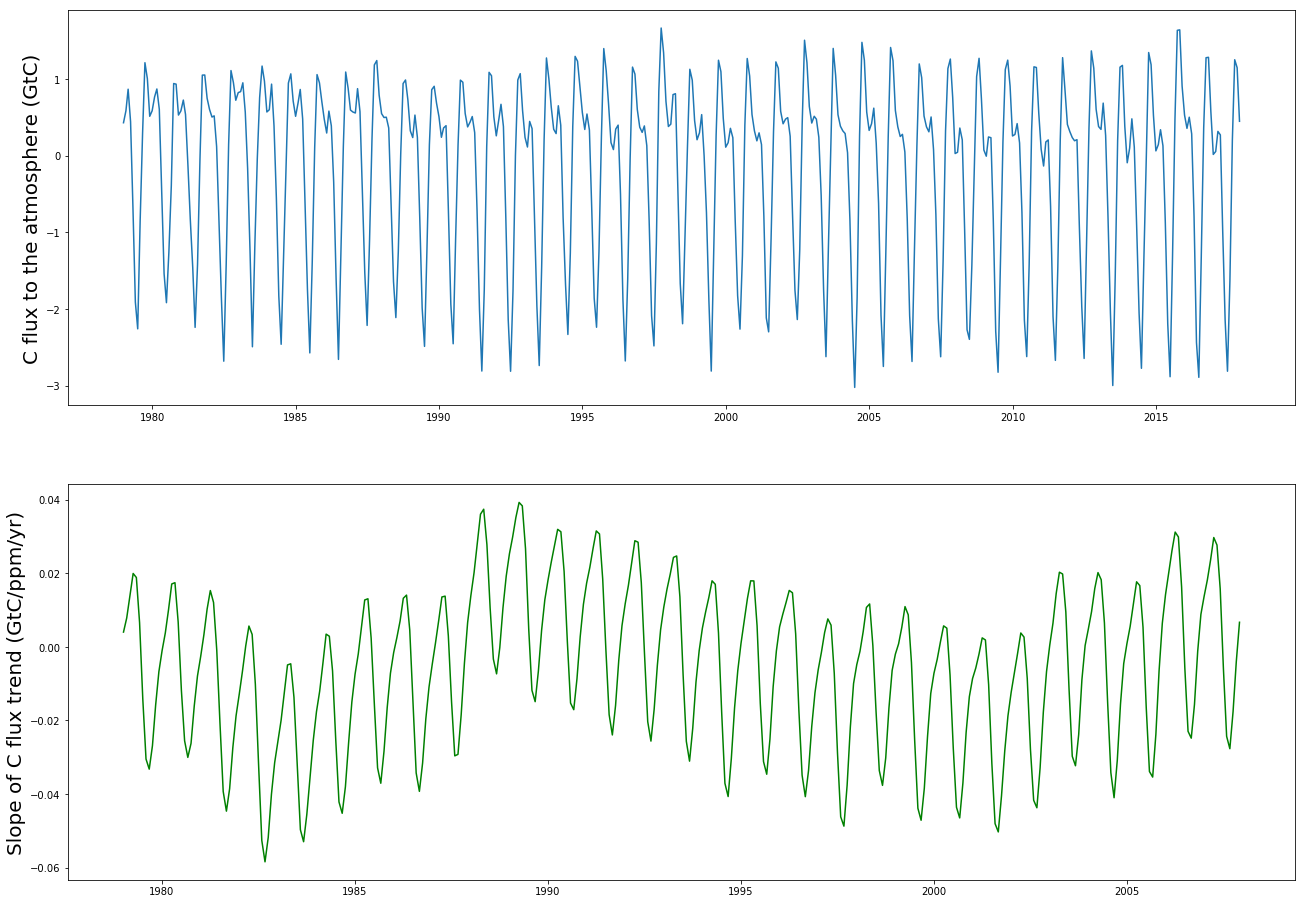

In [142]:
aCAMS.rolling_trend("Earth_Land", 10*12, True, True);

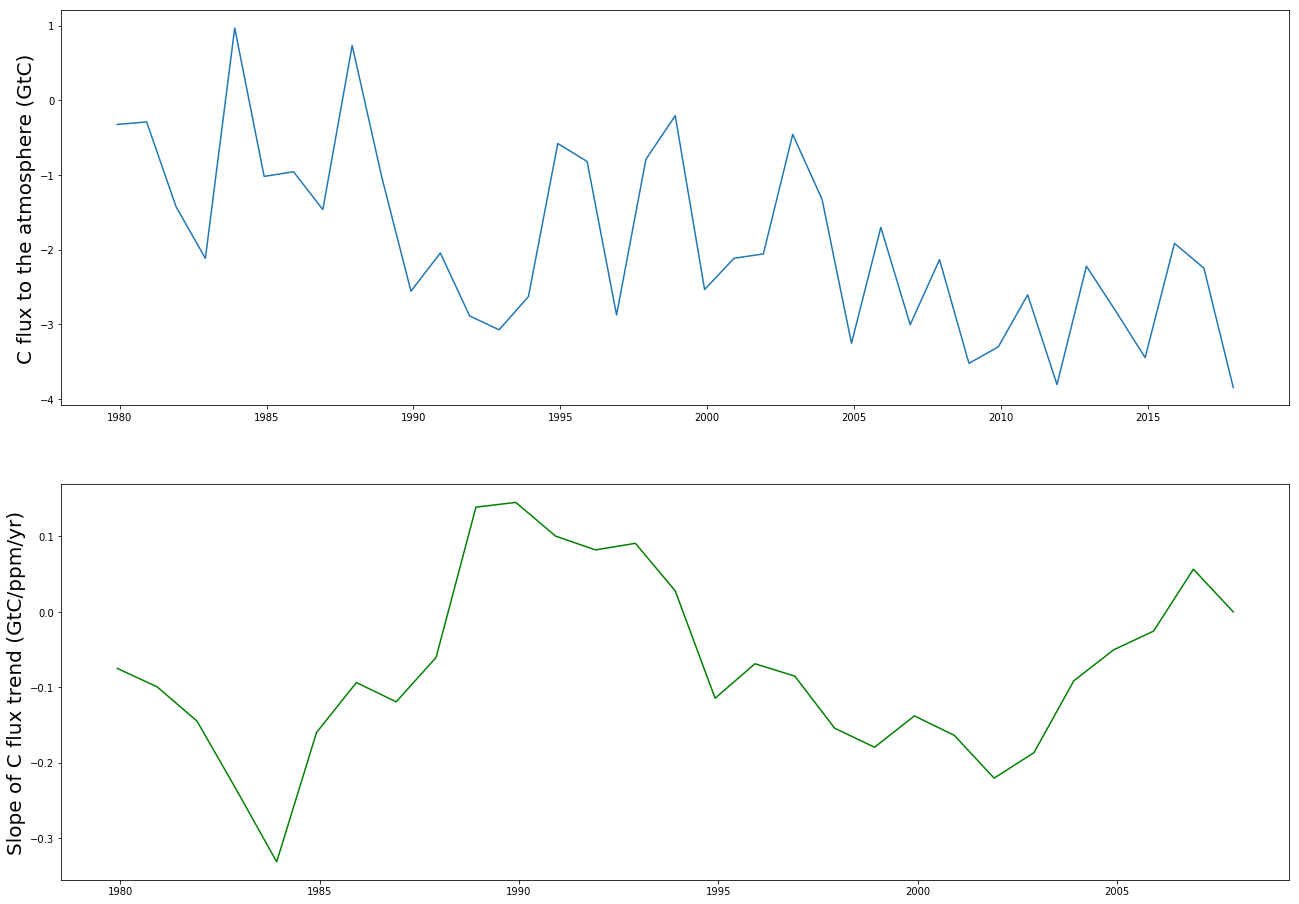

In [146]:
mCAMS = invf.Analysis(fCAMS).rolling_trend("Earth_Land", 10, True, True);

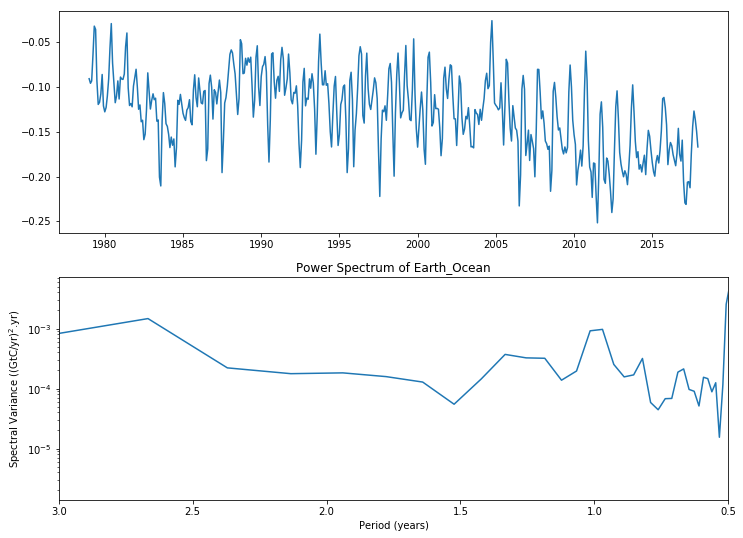

,Period (years),Spectral Variance ((GtC/yr)$^2$.yr)
0.000000,inf,0.000045
0.046875,21.333333,0.000876
0.093750,10.666667,0.001472
0.140625,7.111111,0.000452
0.187500,5.333333,0.000106
...,...,...
5.812500,0.172043,0.000008
5.859375,0.170667,0.000024
5.906250,0.169312,0.000021
5.953125,0.167979,0.000014


In [67]:
aCAMS.psd("Earth_Ocean", fs=12, xlim=[3,0.5], plot=True)

In [68]:
aCAMS.deseasonalise("Earth_Land")

array([-8.26732522e-02,  8.66680486e-02,  1.88999076e-01,  9.35715297e-03,
       -1.11276676e-01, -1.43292989e-01,  1.36718699e-01,  3.18859729e-01,
       -4.75320959e-02, -1.40050332e-01, -2.64721455e-01, -2.74663682e-01,
        7.38996238e-02,  2.68021694e-01,  1.91900145e-01,  1.71588427e-01,
        1.18616802e-01,  2.27583536e-01,  4.78265147e-01, -8.54504094e-02,
       -7.28895269e-01, -4.12047614e-01, -3.35669383e-01, -2.58686489e-01,
        7.20556711e-02,  2.26180963e-01, -1.41544831e-01, -5.70036613e-01,
       -2.83077435e-01,  3.04382726e-01,  1.55726977e-01, -2.46996405e-01,
       -3.82900716e-01, -3.02027332e-01, -2.16301727e-01, -3.95834563e-02,
        9.03178097e-02,  4.72797209e-03, -1.59093846e-01, -3.15927810e-01,
       -2.95682525e-01, -9.29008135e-02, -2.85807049e-01, -2.44948325e-01,
       -1.92829699e-01, -2.42665515e-01, -3.16589302e-01, -6.54150082e-02,
        3.10490331e-01,  3.36785179e-01,  2.72546129e-01,  1.31918583e-01,
        3.86953754e-01,  

/home/student.unimelb.edu.au/rursino/anaconda3/lib/python3.7/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


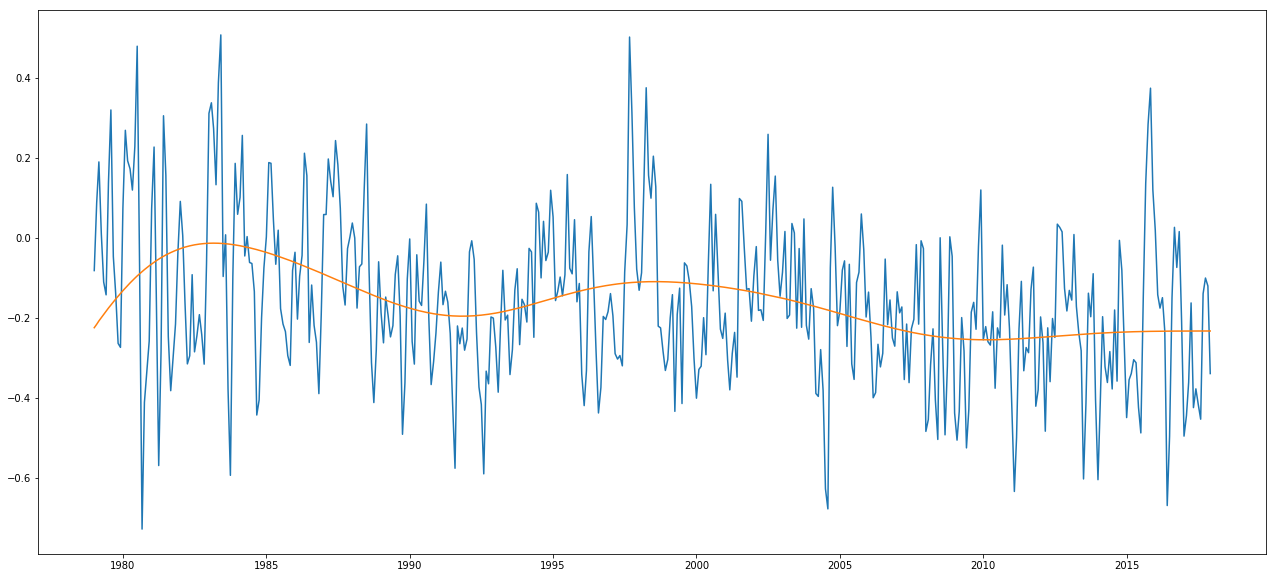

In [69]:
plt.figure(figsize=(22,10))
plt.plot(aCAMS.time, aCAMS.deseasonalise("Earth_Land"))
plt.plot(aCAMS.time, aCAMS.bandpass("Earth_Land", 1/(10*12), deseasonalise_first=True))

# Rolling gradient functions

In [76]:
aCAMS.data.time[0]

<xarray.DataArray 'time' ()>
array(cftime.Datetime360Day(1979, 1, 16, 0, 0, 0, 0, 2, 16), dtype=object)
Coordinates:
    time     object 1979-01-16 00:00:00

In [77]:
aCAMS.data["Earth_Land"].sel(time=slice(CAMS.data.time[0], CAMS.data.time[0+10]))

<xarray.DataArray 'Earth_Land' (time: 120)>
array([ 0.587993,  0.769167,  0.872226,  0.607813, -0.435116, -1.539517,
       -1.918248, -1.257281, -0.388206,  0.943316,  0.935349,  0.53163 ,
        0.586149,  0.727326,  0.538781, -0.133812, -0.83681 , -1.462718,
       -2.240786, -1.418827, -0.042211,  1.053336,  1.054717,  0.750733,
        0.604411,  0.505873,  0.521232,  0.120297, -0.849416, -1.860001,
       -2.68232 , -1.416779,  0.14786 ,  1.112698,  0.95443 ,  0.724901,
        0.824584,  0.837931,  0.952872,  0.568143, -0.166779, -1.260613,
       -2.493953, -1.165028, -0.038174,  0.760828,  1.171617,  0.975682,
        0.572155,  0.601435,  0.935594,  0.39006 , -0.551447, -1.829498,
       -2.461434, -1.307029, -0.103048,  0.949128,  1.069789,  0.714675,
        0.515477,  0.688468,  0.865851,  0.47999 , -0.62061 , -1.748766,
       -2.574201, -1.388081,  0.105481,  1.059969,  0.951292,  0.707811,
        0.477196,  0.297168,  0.583458,  0.391312, -0.343005, -1.612497,
       

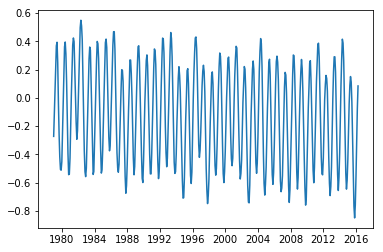

In [80]:
window_size = 20
roll_values = []
for i in range(0, len(aCAMS.time) - window_size):
    timeCAMS = aCAMS.time[i:i+window_size+1]
    subCAMS = aCAMS.data["Earth_Land"].sel(time=slice(aCAMS.data.time[i], aCAMS.data.time[i+window_size])).values
    
    statsCAMS = stats.linregress(timeCAMS.year, subCAMS)
    
    roll_values.append(statsCAMS[0])
    
plt.plot(aCAMS.time[:len(aCAMS.time) - window_size], roll_values)

In [82]:
f = aCAMS.data["Earth_Land"].sel(time=slice(aCAMS.data.time[0], aCAMS.data.time[0+10])).time.values
f

array([cftime.Datetime360Day(1979, 1, 16, 0, 0, 0, 0, 2, 16),
       cftime.Datetime360Day(1979, 2, 16, 0, 0, 0, 0, 4, 46),
       cftime.Datetime360Day(1979, 3, 16, 0, 0, 0, 0, 6, 76),
       cftime.Datetime360Day(1979, 4, 16, 0, 0, 0, 0, 1, 106),
       cftime.Datetime360Day(1979, 5, 16, 0, 0, 0, 0, 3, 136),
       cftime.Datetime360Day(1979, 6, 16, 0, 0, 0, 0, 5, 166),
       cftime.Datetime360Day(1979, 7, 16, 0, 0, 0, 0, 0, 196),
       cftime.Datetime360Day(1979, 8, 16, 0, 0, 0, 0, 2, 226),
       cftime.Datetime360Day(1979, 9, 16, 0, 0, 0, 0, 4, 256),
       cftime.Datetime360Day(1979, 10, 16, 0, 0, 0, 0, 6, 286),
       cftime.Datetime360Day(1979, 11, 16, 0, 0, 0, 0, 1, 316)],
      dtype=object)

In [122]:
def date(f):
    return f.year + (f.month-1 + f.day/31)/12

In [134]:
date(CAMS.time)

Float64Index([1979.9193548387098, 1980.9193548387098, 1981.9193548387098,
              1982.9193548387098, 1983.9193548387098, 1984.9193548387098,
              1985.9193548387098, 1986.9193548387098, 1987.9193548387098,
              1988.9193548387098, 1989.9193548387098, 1990.9193548387098,
              1991.9193548387098, 1992.9193548387098, 1993.9193548387098,
              1994.9193548387098, 1995.9193548387098, 1996.9193548387098,
              1997.9193548387098, 1998.9193548387098, 1999.9193548387098,
              2000.9193548387098, 2001.9193548387098, 2002.9193548387098,
              2003.9193548387098, 2004.9193548387098, 2005.9193548387098,
              2006.9193548387098, 2007.9193548387098, 2008.9193548387098,
              2009.9193548387098, 2010.9193548387098, 2011.9193548387098,
              2012.9193548387098, 2013.9193548387098, 2014.9193548387098,
              2015.9193548387098, 2016.9193548387098, 2017.9193548387098],
             dtype='float64')

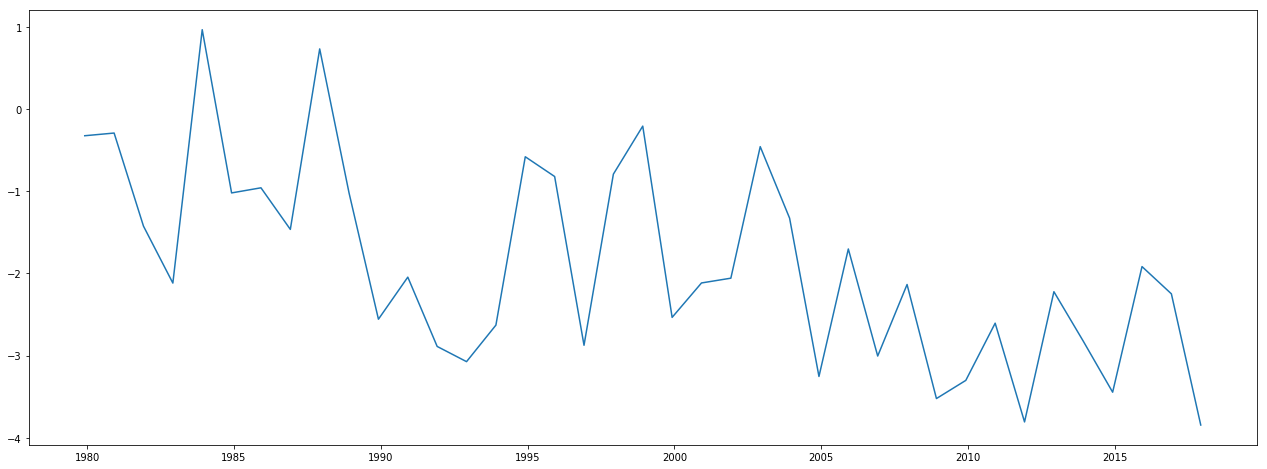

In [135]:
plt.figure(figsize=(22,8))
plt.plot(date(CAMS.time), CAMS.data.Earth_Land)

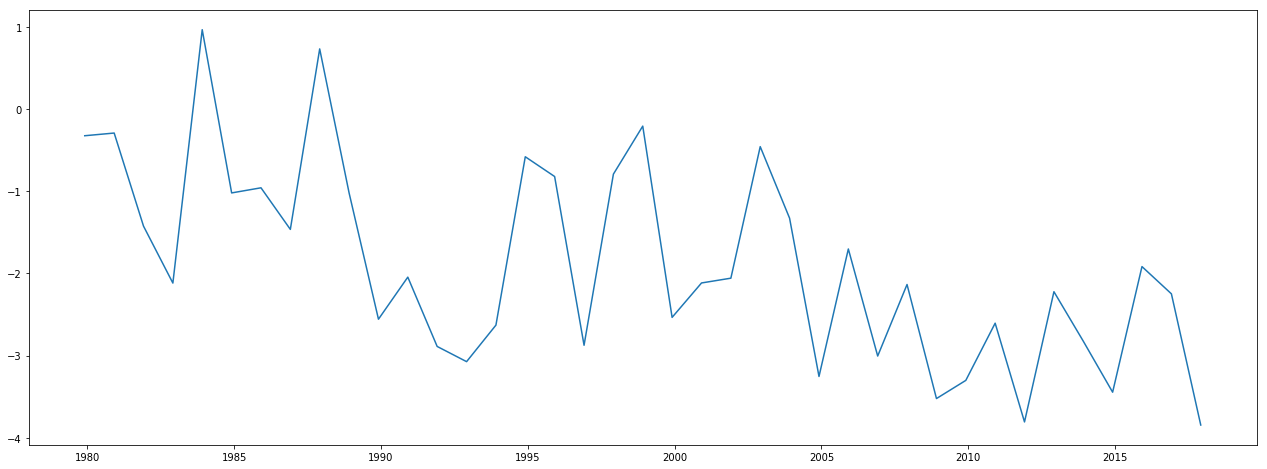

In [136]:
plt.figure(figsize=(22,8))
plt.plot(CAMS.time, CAMS.data.Earth_Land)

In [90]:
f[0].day/365

0.043835616438356165

In [89]:
f[0].month/12

0.08333333333333333

In [95]:
dir(f[0])

['__add__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__pyx_vtable__',
 '__radd__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rsub__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '_to_real_datetime',
 'calendar',
 'datetime_compatible',
 'day',
 'dayofwk',
 'dayofyr',
 'format',
 'hour',
 'microsecond',
 'minute',
 'month',
 'replace',
 'second',
 'strftime',
 'timetuple',
 'year']